## No DER system

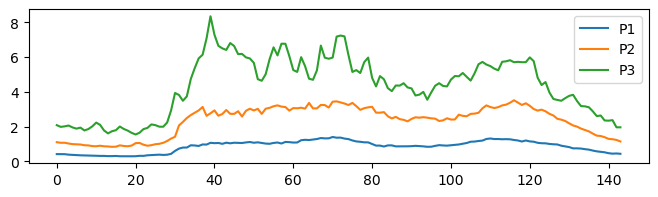

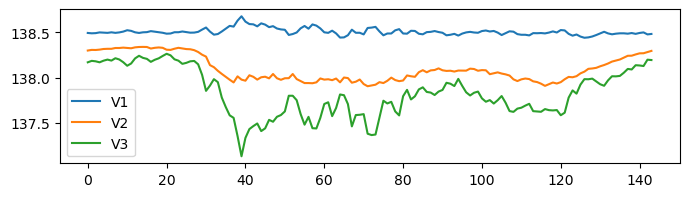

In [1]:
import dssMonitor
import matplotlib.pyplot as plt

# Path of power data
# routePQsource = '../dssfiles/HCtest_ckt_Mon_subestacionpq_1.csv'
routePQline1 = './dssfiles/HCtest_ckt_Mon_lv_pqline1_1.csv'
routePQ1 = './dssfiles/HCtest_ckt_Mon_lv_pqload1_1.csv'
routePQ2 = './dssfiles/HCtest_ckt_Mon_lv_pqload2_1.csv'
routePQ3 = './dssfiles/HCtest_ckt_Mon_lv_pqload3_1.csv'
# Path of voltage data
routeVI1 = './dssfiles/HCtest_ckt_Mon_lv_viload1_1.csv'
routeVI2 = './dssfiles/HCtest_ckt_Mon_lv_viload2_1.csv'
routeVI3 = './dssfiles/HCtest_ckt_Mon_lv_viload3_1.csv'

monitor_Data = dssMonitor.dssData()

PQline1_data = monitor_Data.monitor_PQ(routePQline1, 3)
PQ1_data = monitor_Data.monitor_PQ(routePQ1, 1)
PQ2_data = monitor_Data.monitor_PQ(routePQ2, 1)
PQ3_data = monitor_Data.monitor_PQ(routePQ3, 1)
VI1_data = monitor_Data.monitor_VI(routeVI1, 2)
VI2_data = monitor_Data.monitor_VI(routeVI2, 2)
VI3_data = monitor_Data.monitor_VI(routeVI3, 2)

Pin = [s for s, _ in PQline1_data]
P1 = [p for p, _ in PQ1_data]
P2 = [p for p, _ in PQ2_data]
P3 = [p for p, _ in PQ3_data]
V1 = [v[0][0] for v, _ in VI1_data]
V2 = [v[0][0] for v, _ in VI2_data]
V3 = [v[0][0] for v, _ in VI3_data]

# P
plt.figure(figsize=(8, 2))
plt.plot(P1, label='P1')
plt.plot(P2, label='P2')
plt.plot(P3, label='P3')
plt.legend()
# Voltages
plt.figure(figsize=(8, 2))
plt.plot(V1, label='V1')
plt.plot(V2, label='V2')
plt.plot(V3, label='V3')
plt.legend()
plt.show()

## DER sys: PV system

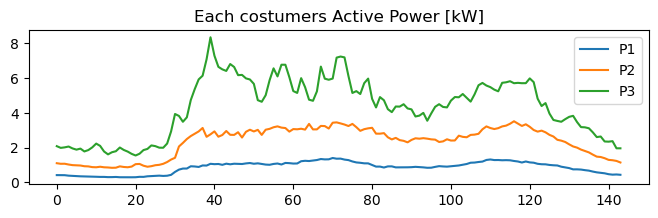

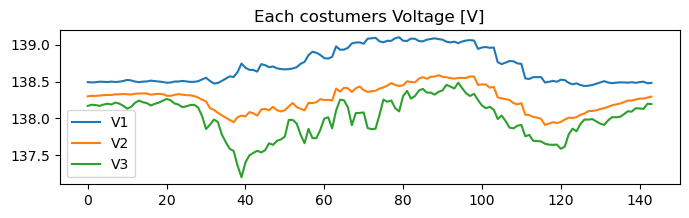

In [2]:
import dssMonitor
import matplotlib.pyplot as plt

# Path of power data
# routePQsource = '../dssfiles/HCtest_ckt_Mon_subestacionpq_1.csv'
routePQline1 = './dssfiles/HCtest_ckt_Mon_lv_pqline1_1.csv'
routePQ1 = './dssfiles/HCtest_ckt_Mon_lv_pqload1_1.csv'
routePQ2 = './dssfiles/HCtest_ckt_Mon_lv_pqload2_1.csv'
routePQ3 = './dssfiles/HCtest_ckt_Mon_lv_pqload3_1.csv'
# Path of voltage data
routeVI1 = './dssfiles/HCtest_ckt_Mon_lv_viload1_1.csv'
routeVI2 = './dssfiles/HCtest_ckt_Mon_lv_viload2_1.csv'
routeVI3 = './dssfiles/HCtest_ckt_Mon_lv_viload3_1.csv'

monitor_Data = dssMonitor.dssData()

PQline1_PV_data = monitor_Data.monitor_PQ(routePQline1, 3)
PQ1_data = monitor_Data.monitor_PQ(routePQ1, 1)
PQ2_data = monitor_Data.monitor_PQ(routePQ2, 1)
PQ3_data = monitor_Data.monitor_PQ(routePQ3, 1)
VI1_data = monitor_Data.monitor_VI(routeVI1, 2)
VI2_data = monitor_Data.monitor_VI(routeVI2, 2)
VI3_data = monitor_Data.monitor_VI(routeVI3, 2)

Pin_PVsys = [s for s, _ in PQline1_PV_data]     # source
P1 = [p for p, _ in PQ1_data]
P2 = [p for p, _ in PQ2_data]
P3 = [p for p, _ in PQ3_data]
V1 = [v[0][0] for v, _ in VI1_data]
V2 = [v[0][0] for v, _ in VI2_data]
V3 = [v[0][0] for v, _ in VI3_data]

# P
plt.figure(figsize=(8, 2))
plt.plot(P1, label='P1')
plt.plot(P2, label='P2')
plt.plot(P3, label='P3')
plt.title('Each costumers Active Power [kW]')
plt.legend()
# Voltages
plt.figure(figsize=(8, 2))
plt.plot(V1, label='V1')
plt.plot(V2, label='V2')
plt.plot(V3, label='V3')
plt.title('Each costumers Voltage [V]')
plt.legend()
plt.show()


### Impact on the active power:

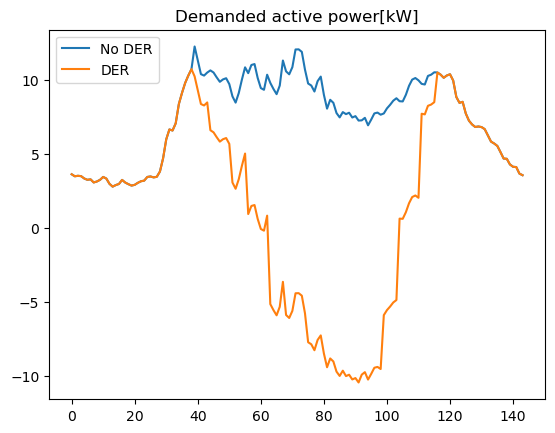

In [3]:
plt.plot(Pin, label='No DER')
plt.plot(Pin_PVsys, label='DER')
plt.title('Demanded active power[kW]')
plt.legend()
plt.show()

The PVsystem is providing power to the substation.

### Voltage sensitivity analysis: At costumer 1 location.

1. Considering active power only.

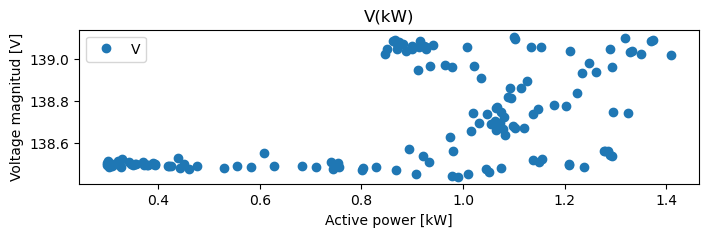

In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 2))
plt.plot(P1, V1, 'o', label='V')
plt.title('V(kW)')
plt.xlabel('Active power [kW]')
plt.ylabel('Voltage magnitud [V]')
plt.legend()
plt.show()


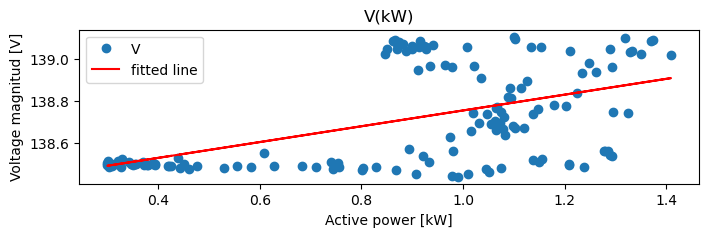

In [5]:
from scipy import stats
P1 = np.array(P1)
V1 = np.array(V1)
res = stats.linregress(P1, V1)

plt.figure(figsize=(8, 2))
plt.plot(P1, V1, 'o', label='V')
plt.plot(P1, res.intercept + res.slope*P1, 'r', label='fitted line')
plt.title('V(kW)')
plt.xlabel('Active power [kW]')
plt.ylabel('Voltage magnitud [V]')
plt.legend()
plt.show()

In [6]:
# Voltage coefficient
print(f"m = {res.slope}")

m = 0.3747585413266341


## CKT Daily

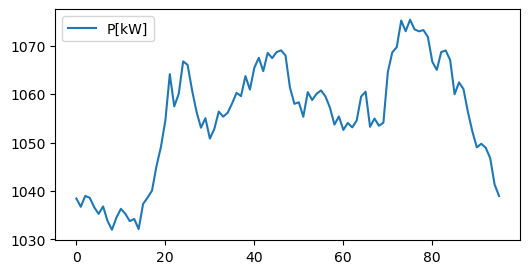

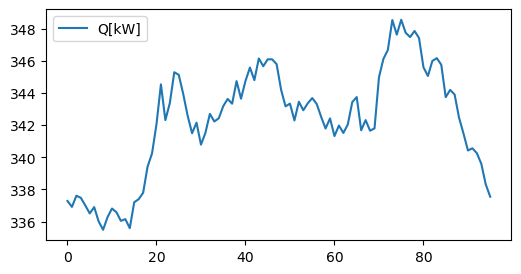

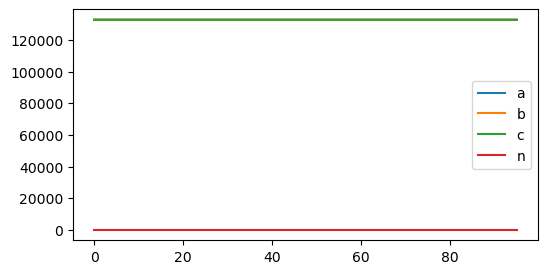

In [4]:
import dssMonitor
import matplotlib.pyplot as plt

routePQ = '../dssfiles/CKT_Daily/CKT_Mon_subestacionpq_1.csv'
routeVI = '../dssfiles/CKT_Daily/CKT_Mon_subestacionvi_1.csv'
monitor_Data = dssMonitor.dssData()
PQ_data = monitor_Data.monitor_PQ(routePQ, 3)
VI_data = monitor_Data.monitor_VI(routeVI, 4)
P = [p[0] for p in PQ_data]
Q = [q[1] for q in PQ_data]

Va = [v[0][0] for v, _ in VI_data]
Vb = [v[1][0] for v, _ in VI_data]
Vc = [v[2][0] for v, _ in VI_data]
Vn = [v[3][0] for v, _ in VI_data]

# P
plt.figure(figsize=(6, 3))
plt.plot(P, label='P[kW]')
plt.legend()
# Q
plt.figure(figsize=(6, 3))
plt.plot(Q, label='Q[kW]')
plt.legend()
# Voltages
plt.figure(figsize=(6, 3))
plt.plot(Va, label='a')
plt.plot(Vb, label='b')
plt.plot(Vc, label='c')
plt.plot(Vn, label='n')
plt.legend()
plt.show()